In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from keras import backend as K 



from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer



%matplotlib inline
class_names = ["Normal", "Corrupt", "Delay", "Duplicate", "Loss"]

seed = 0

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, fig_size=(12,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  depreca

In [2]:
infile = open("../../tstat_labels_indexes.txt" ,'r')
data_field_list = []
for line in infile.readlines():
    if ":" in line:
        data_field = str(re.search('%s(.*)%s' % ("\"", "\""), line).group(1))
        index = int(re.search('%s(.*)%s' % (":", ","), line).group(1))
        data_field_list.append((data_field, index))

index_to_key_dict = {}
key_to_index_dict = {}
data_field_labels = []
for data_field, index in data_field_list:
    key_to_index_dict[data_field] = index
    index_to_key_dict[index] = data_field
    data_field_labels.append(data_field)



In [3]:
def read_in_file(file_name):
    infile = open(file_name, 'r')
    header = infile.readline().split(' ')
    entries = []
    labels = None
    for i, line in enumerate(infile.readlines()):
        row = get_data_row(line)
        row = clean_data_row(row)
        if row != []:
            entries.append(row)
    entries = np.array(entries)
    return entries

In [4]:
def get_data_row(line):
    global index_to_key_dict
    line = line.split(' ')
    row = []
    labels = []
    c_pkt_cnt = 0
    s_pkt_cnt = 0
    c_bytes_cnt = 0
    s_bytes_cnt = 0
    for data_field, index in data_field_list:
        #print("df:", data_field,"ix:",index)
        #print(line)
        
        
        if data_field == "client_pkt_cnt":
            try:
                c_pkt_cnt = line[index]
                c_pkt_cnt = max(float(c_pkt_cnt), 1)
            except:
                c_pkt_cnt = 1
            #if c_pkt_cnt < 32:
            #    return []
        elif data_field == "serv_pkt_cnt":
            try:
                s_pkt_cnt = line[index]
                s_pkt_cnt = max(float(s_pkt_cnt), 1)
            except:
                s_pkt_cnt = 1
        elif data_field == "client_bytes_cnt":
            try:
                c_bytes_cnt = line[index]
                c_bytes_cnt = max(float(c_bytes_cnt), 1)
            except:
                c_bytes_cnt = 1
        elif data_field == "serv_bytes_cnt":
            try:
                s_bytes_cnt = line[index]
                s_bytes_cnt = max(float(s_bytes_cnt), 1)
            except:
                s_bytes_cnt = 1
                
    for data_field, index in data_field_list:
        try:
            val = line[index]
            val = float(val)
        except:
            val = 0
        row.append(val)    
    return row

In [5]:
def clean_data_row(in_row):
    global index_to_key_dict, key_to_index_dict
    return in_row

In [6]:
packet_count_threshold = 200
def get_dataset(path1,path2 ="",path3 =""):
    path = path1+str(path2)+path3
    out_data = []
    file = open('summary.out', 'w')
    for sub_dir in os.listdir(path):
        temp_path = os.path.join(path, sub_dir)
        temp_path = os.path.join(temp_path, "log_tcp_complete")
        if os.path.isfile(temp_path): 
            temp_data = np.nan_to_num(read_in_file(temp_path))
            rows_before = temp_data.shape[0]
            if rows_before == 0:
                continue
            temp_data = temp_data[temp_data[:,2] > packet_count_threshold]
            rows_after = temp_data.shape[0]
            print (path + " removed " + str(rows_before-rows_after) + "/" + str(rows_before) + " rows")
            if len(temp_data) == 0:
                continue
            if out_data == []:
                out_data = temp_data
            else:
                out_data = np.concatenate((out_data, temp_data))
    file.close
    return out_data

In [7]:
prefix = "../../DataSet/emulab/true/cubic20";
emulab_normal_normal = get_dataset(prefix,"","/normal")
emulab_normal_corrupt_001 = get_dataset(prefix,"","/corrupt_0.01")
emulab_normal_corrupt_005 = get_dataset(prefix,"","/corrupt_0.05")
emulab_normal_corrupt_01 = get_dataset(prefix,"","/corrupt_0.1")
emulab_normal_corrupt_05 = get_dataset(prefix,"","/corrupt_0.5")

emulab_normal_delay_1_1 = get_dataset(prefix,"","/delay_1_var_1")
emulab_normal_delay_5_2 = get_dataset(prefix,"","/delay_5_var_2")
emulab_normal_delay_10_5 = get_dataset(prefix,"","/delay_10_var_5")
emulab_normal_delay_25_20 = get_dataset(prefix,"","/delay_25_var_20")

emulab_normal_loss_001 = get_dataset(prefix,"","/loss_0.01")
emulab_normal_loss_005 = get_dataset(prefix,"","/loss_0.05")
emulab_normal_loss_01 = get_dataset(prefix,"","/loss_0.1")
emulab_normal_loss_05 = get_dataset(prefix,"","/loss_0.5")

emulab_normal_duplicate_001 = get_dataset(prefix,"","/duplicate_0.01")
emulab_normal_duplicate_005 = get_dataset(prefix,"","/duplicate_0.05")
emulab_normal_duplicate_01 = get_dataset(prefix,"","/duplicate_0.1")
emulab_normal_duplicate_05 = get_dataset(prefix,"","/duplicate_0.5")

 

l1  = np.ones(len(emulab_normal_normal  ))    *1

l2  = np.ones(len(emulab_normal_corrupt_001  ))   *2
l3  = np.ones(len(emulab_normal_corrupt_005  ))   *2
l4  = np.ones(len(emulab_normal_corrupt_01  ))   *2
l5  = np.ones(len(emulab_normal_corrupt_05  ))   *2

l6  = np.ones(len(emulab_normal_delay_1_1))   *3
l7  = np.ones(len(emulab_normal_delay_5_2))   *3
l8  = np.ones(len(emulab_normal_delay_10_5))  *3
l9  = np.ones(len(emulab_normal_delay_25_20)) *3

l10  = np.ones(len(emulab_normal_loss_001 ) )   *5
l11  = np.ones(len(emulab_normal_loss_005 ) )   *5
l12  = np.ones(len(emulab_normal_loss_01 ) )   *5
l13  = np.ones(len(emulab_normal_loss_05))      *5

l14 = np.ones(len(emulab_normal_duplicate_001 ) )    *4
l15  = np.ones(len(emulab_normal_duplicate_005 ) )   *4
l16  = np.ones(len(emulab_normal_duplicate_01 ) )   *4
l17  = np.ones(len(emulab_normal_duplicate_05 ) )   *4


emulab_normal_data = np.concatenate((emulab_normal_normal,
    emulab_normal_corrupt_001,
    emulab_normal_corrupt_005,
    emulab_normal_corrupt_01,
    emulab_normal_corrupt_05,                
    emulab_normal_delay_1_1,
    emulab_normal_delay_5_2,
    emulab_normal_delay_10_5,
    emulab_normal_delay_25_20,
    emulab_normal_loss_001,
    emulab_normal_loss_005,
    emulab_normal_loss_01,
    emulab_normal_loss_05,
    emulab_normal_duplicate_001,
    emulab_normal_duplicate_005,
    emulab_normal_duplicate_01,
    emulab_normal_duplicate_05))

pandas_emulab_normal = pd.DataFrame(data=emulab_normal_data, 
              columns=data_field_labels)
emulab_normal_data = PowerTransformer().fit_transform(pandas_emulab_normal)

emulab_normal_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
emulab_normal_anom_type_data_labels = pd.DataFrame(data=emulab_normal_anom_type_data_labels)
emulab_normal_anom_type_data_labels = emulab_normal_anom_type_data_labels.values.ravel()


/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


../../DataSet/emulab/true/cubic20/normal removed 119/239 rows
../../DataSet/emulab/true/cubic20/normal removed 118/237 rows
../../DataSet/emulab/true/cubic20/normal removed 119/239 rows
../../DataSet/emulab/true/cubic20/corrupt_0.01 removed 164/238 rows
../../DataSet/emulab/true/cubic20/corrupt_0.05 removed 217/238 rows
../../DataSet/emulab/true/cubic20/corrupt_0.1 removed 216/238 rows
../../DataSet/emulab/true/cubic20/corrupt_0.5 removed 200/238 rows
../../DataSet/emulab/true/cubic20/delay_1_var_1 removed 118/194 rows
../../DataSet/emulab/true/cubic20/delay_5_var_2 removed 118/185 rows
../../DataSet/emulab/true/cubic20/delay_10_var_5 removed 119/190 rows
../../DataSet/emulab/true/cubic20/delay_25_var_20 removed 119/199 rows
../../DataSet/emulab/true/cubic20/loss_0.01 removed 119/239 rows
../../DataSet/emulab/true/cubic20/loss_0.05 removed 119/239 rows
../../DataSet/emulab/true/cubic20/loss_0.1 removed 119/239 rows
../../DataSet/emulab/true/cubic20/loss_0.5 removed 119/239 rows
../../D

/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [27]:


prefix = "../../DataSet/emulab/true/base_delay/1g60ms";
emulab_bbr = get_dataset(prefix,"","/normal")
emulab_bbr_corrupt_001 = get_dataset(prefix,"","/corrupt_0.01")
emulab_bbr_corrupt_005 = get_dataset(prefix,"","/corrupt_0.05")
emulab_bbr_corrupt_01 = get_dataset(prefix,"","/corrupt_0.1")
emulab_bbr_corrupt_05 = get_dataset(prefix,"","/corrupt_0.5")

emulab_bbr_delay_1_1 = get_dataset(prefix,"","/delay_1_var_1")
emulab_bbr_delay_5_2 = get_dataset(prefix,"","/delay_5_var_2")
emulab_bbr_delay_10_5 = get_dataset(prefix,"","/delay_10_var_5")
emulab_bbr_delay_25_20 = get_dataset(prefix,"","/delay_25_var_20")

emulab_bbr_loss_001 = get_dataset(prefix,"","/loss_0.01")
emulab_bbr_loss_005 = get_dataset(prefix,"","/loss_0.05")
emulab_bbr_loss_01 = get_dataset(prefix,"","/loss_0.1")
emulab_bbr_loss_05 = get_dataset(prefix,"","/loss_0.5")

emulab_bbr_duplicate_001 = get_dataset(prefix,"","/duplicate_0.01")
emulab_bbr_duplicate_005 = get_dataset(prefix,"","/duplicate_0.05")
emulab_bbr_duplicate_01 = get_dataset(prefix,"","/duplicate_0.1")
emulab_bbr_duplicate_05 = get_dataset(prefix,"","/duplicate_0.5")

 

l1  = np.ones(len(emulab_bbr  ))    *1

l2  = np.ones(len(emulab_bbr_corrupt_001  ))   *2
l3  = np.ones(len(emulab_bbr_corrupt_005  ))   *2
l4  = np.ones(len(emulab_bbr_corrupt_01  ))   *2
l5  = np.ones(len(emulab_bbr_corrupt_05  ))   *2

l6  = np.ones(len(emulab_bbr_delay_1_1))   *3
l7  = np.ones(len(emulab_bbr_delay_5_2))   *3
l8  = np.ones(len(emulab_bbr_delay_10_5))  *3
l9  = np.ones(len(emulab_bbr_delay_25_20)) *3

l10  = np.ones(len(emulab_bbr_loss_001 ) )   *5
l11  = np.ones(len(emulab_bbr_loss_005 ) )   *5
l12  = np.ones(len(emulab_bbr_loss_01 ) )   *5
l13  = np.ones(len(emulab_bbr_loss_05))      *5

l14 = np.ones(len(emulab_bbr_duplicate_001 ) )    *4
l15  = np.ones(len(emulab_bbr_duplicate_005 ) )   *4
l16  = np.ones(len(emulab_bbr_duplicate_01 ) )   *4
l17  = np.ones(len(emulab_bbr_duplicate_05 ) )   *4


emulab_bbr_data = np.concatenate((emulab_bbr,
    emulab_bbr_corrupt_001,
    emulab_bbr_corrupt_005,
    emulab_bbr_corrupt_01,
    emulab_bbr_corrupt_05,                
    emulab_bbr_delay_1_1,
    emulab_bbr_delay_5_2,
    emulab_bbr_delay_10_5,
    emulab_bbr_delay_25_20,
    emulab_bbr_loss_001,
    emulab_bbr_loss_005,
    emulab_bbr_loss_01,
    emulab_bbr_loss_05,
    emulab_bbr_duplicate_001,
    emulab_bbr_duplicate_005,
    emulab_bbr_duplicate_01,
    emulab_bbr_duplicate_05))

pandas_emulab_bbr = pd.DataFrame(data=emulab_bbr_data, 
              columns=data_field_labels)
emulab_bbr_data = PowerTransformer().fit_transform(pandas_emulab_bbr)

emulab_bbr_anom_type_data_labels = np.concatenate((l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17))
emulab_bbr_anom_type_data_labels = pd.DataFrame(data=emulab_bbr_anom_type_data_labels)
emulab_bbr_anom_type_data_labels = emulab_bbr_anom_type_data_labels.values.ravel()


../../DataSet/emulab/true/base_delay/1g60ms/normal removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/normal removed 119/237 rows
../../DataSet/emulab/true/base_delay/1g60ms/normal removed 119/235 rows
../../DataSet/emulab/true/base_delay/1g60ms/corrupt_0.01 removed 119/237 rows
../../DataSet/emulab/true/base_delay/1g60ms/corrupt_0.05 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/corrupt_0.1 removed 119/234 rows
../../DataSet/emulab/true/base_delay/1g60ms/corrupt_0.5 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/delay_1_var_1 removed 118/193 rows
../../DataSet/emulab/true/base_delay/1g60ms/delay_5_var_2 removed 119/197 rows
../../DataSet/emulab/true/base_delay/1g60ms/delay_10_var_5 removed 119/197 rows
../../DataSet/emulab/true/base_delay/1g60ms/delay_25_var_20 removed 118/195 rows
../../DataSet/emulab/true/base_delay/1g60ms/loss_0.01 removed 119/238 rows


/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


../../DataSet/emulab/true/base_delay/1g60ms/loss_0.05 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/loss_0.1 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/loss_0.5 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/duplicate_0.01 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/duplicate_0.05 removed 119/237 rows
../../DataSet/emulab/true/base_delay/1g60ms/duplicate_0.1 removed 119/238 rows
../../DataSet/emulab/true/base_delay/1g60ms/duplicate_0.5 removed 119/237 rows


/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [28]:

emulab_normal_train_data, emulab_normal_test_data, emulab_normal_train_labels, emulab_normal_test_labels = train_test_split(emulab_normal_data, 
                                                                   emulab_normal_anom_type_data_labels, random_state=seed)
emulab_normal_train_data, emulab_normal_train_labels = SMOTE().fit_resample(emulab_normal_train_data, emulab_normal_train_labels)

emulab_bbr_train_data, emulab_bbr_test_data, emulab_bbr_train_labels, emulab_bbr_test_labels = train_test_split(emulab_bbr_data, 
                                                                   emulab_bbr_anom_type_data_labels, random_state=seed)
emulab_bbr_train_data, emulab_bbr_train_labels = SMOTE().fit_resample(emulab_bbr_train_data, emulab_bbr_train_labels)



/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/pooya/conda/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and wi

Train on 1484 samples, validate on 371 samples
Epoch 1/10
1484/1484 [==============================] - 0s 227us/step - loss: 0.5207 - accuracy: 0.8369 - val_loss: 0.1343 - val_accuracy: 0.9596
Epoch 2/10
1484/1484 [==============================] - 0s 77us/step - loss: 0.1289 - accuracy: 0.9704 - val_loss: 0.0524 - val_accuracy: 0.9811
Epoch 3/10
1484/1484 [==============================] - 0s 82us/step - loss: 0.1021 - accuracy: 0.9737 - val_loss: 0.0465 - val_accuracy: 0.9838
Epoch 4/10
1484/1484 [==============================] - 0s 78us/step - loss: 0.0651 - accuracy: 0.9832 - val_loss: 0.0429 - val_accuracy: 0.9838
Epoch 5/10
1484/1484 [==============================] - 0s 87us/step - loss: 0.0603 - accuracy: 0.9825 - val_loss: 0.0097 - val_accuracy: 0.9973
Epoch 6/10
1484/1484 [==============================] - 0s 83us/step - loss: 0.0487 - accuracy: 0.9811 - val_loss: 0.0310 - val_accuracy: 0.9865
Epoch 7/10
1484/1484 [==============================] - 0s 74us/step - loss: 0.060

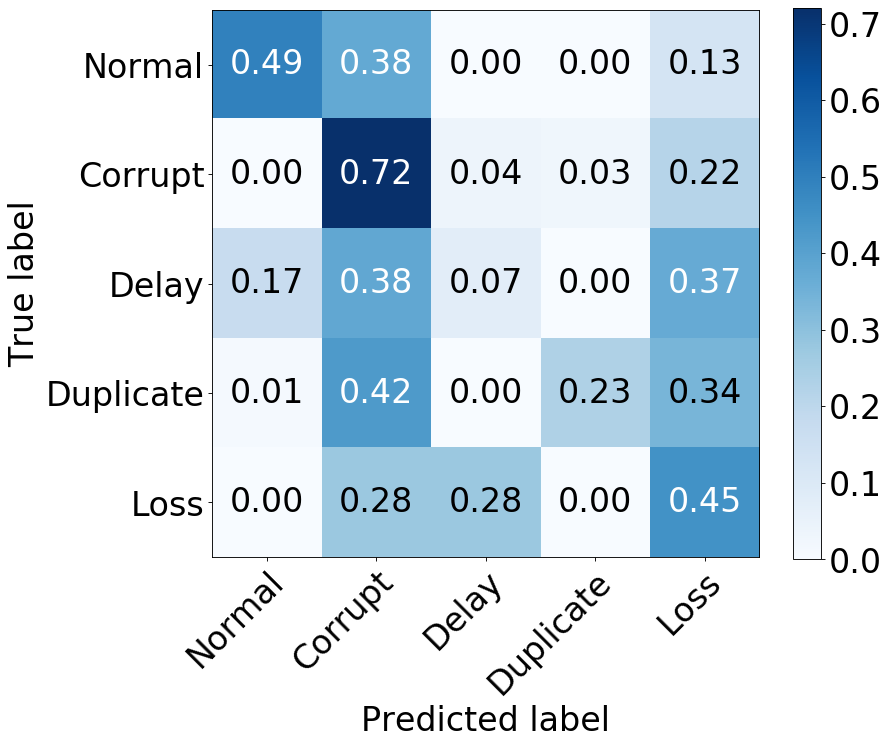

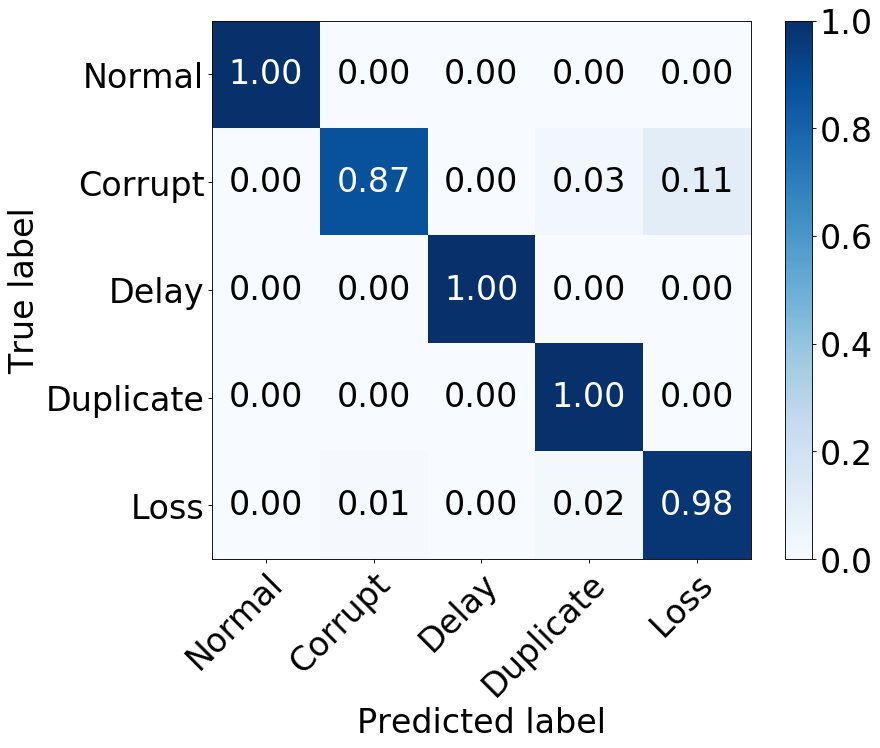

In [29]:
# create model
model = None
model = Sequential()

#get number of columns in training data
n_cols = emulab_bbr_train_data.shape[1]

model.add(Dense(300, activation='relu', input_dim=n_cols))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)

emulab_bbr_train_labels_cat = to_categorical(emulab_bbr_train_labels)
emulab_normal_train_labels_cat = to_categorical(emulab_normal_train_labels)


model.fit(emulab_normal_train_data, emulab_normal_train_labels_cat, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])

emulab_bbr_predicted_labels = model.predict(emulab_bbr_test_data)
plot_confusion_matrix(emulab_bbr_test_labels, np.argmax(emulab_bbr_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('bbr_model_bbr_data_NN_bbr.pdf')
plt.show()
report = classification_report(emulab_bbr_test_labels, np.argmax(emulab_bbr_predicted_labels, axis=1), output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("bbr_model_bbr_data_NN_CR_bbr.csv", sep='\t')



emulab_normal_predicted_labels = model.predict(emulab_normal_test_data)
report = classification_report(emulab_normal_test_labels, np.argmax(emulab_normal_predicted_labels, axis=1), output_dict=True )
df = pd.DataFrame(report).transpose()
df.to_csv("bbr_model_normal_data_NN_CR.csv", sep='\t')
plot_confusion_matrix(emulab_normal_test_labels, np.argmax(emulab_normal_predicted_labels, axis=1) , normalize=True,classes=class_names, title='')
plt.rcParams.update({'font.size': 30})
plt.savefig('bbr_model_normal_data_NN.pdf')
plt.show()





